In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd
import datetime

In [2]:
file = 'bb_os_46013.txt'
file1 = 'bb_ns_BDXC1.txt'
bbos = pd.read_csv(file,skiprows=1,na_values=[99,999.0],delimiter="\s+")
bbns = pd.read_csv(file1,skiprows=1,na_values=[99,999.0],delimiter="\s+")

In [3]:
print('bbos head')
print(bbos.head())
print('bbns head')
print(bbns.head())

bbos head
    %yr  mo  dy  hr  mn   degT  m/s  m/s.1     m    sec  sec.1  degT.1  \
0  2017   1   1   0   0  302.0  4.1    5.8   NaN    NaN    NaN     NaN   
1  2017   1   1   0  10  300.0  4.6    6.5   NaN    NaN    NaN     NaN   
2  2017   1   1   0  20  292.0  4.6    6.4   NaN    NaN    NaN     NaN   
3  2017   1   1   0  30  292.0  5.1    6.9   NaN    NaN    NaN     NaN   
4  2017   1   1   0  40  289.0  5.9    7.6  2.37  11.43   9.29   302.0   

      hPa  degC  degC.1  degC.2  mi  ft  
0  1014.9  10.4    11.0     4.5 NaN NaN  
1  1015.0  10.4    11.0     4.7 NaN NaN  
2  1014.9  10.5    11.0     5.4 NaN NaN  
3  1014.9  10.6    11.0     5.6 NaN NaN  
4  1014.9  10.6    11.0     5.5 NaN NaN  
bbns head
      yr  mo  dy  hr   mn     m  degC  mS/cm  psu  ppm  ug/l  FTU   -  mv
2017   1   1   0   0  0.0  11.3   NaN   31.7  NaN  NaN   NaN  NaN NaN NaN
2017   1   1   1   0  0.0  11.3   NaN   31.6  NaN  NaN   NaN  NaN NaN NaN
2017   1   1   2   0  0.0  11.3   NaN   31.6  NaN  NaN   NaN 

In [4]:
time_bbos = pd.to_datetime(dict(year=bbos['%yr'], month=bbos.mo, day=bbos.dy))
time_bbns = pd.to_datetime(dict(year=bbns.index, month=bbns.yr, day=bbns.mo))
ii = np.isfinite(bbos['degC.1']+bbos['degC.1'] < 999.0)
kk = np.isfinite(bbns.m + bbns.m < 999.0)
temp_bbos = bbos['degC.1'][ii]
temp_bbns = bbns.m[kk]

<IPython.core.display.Javascript object>


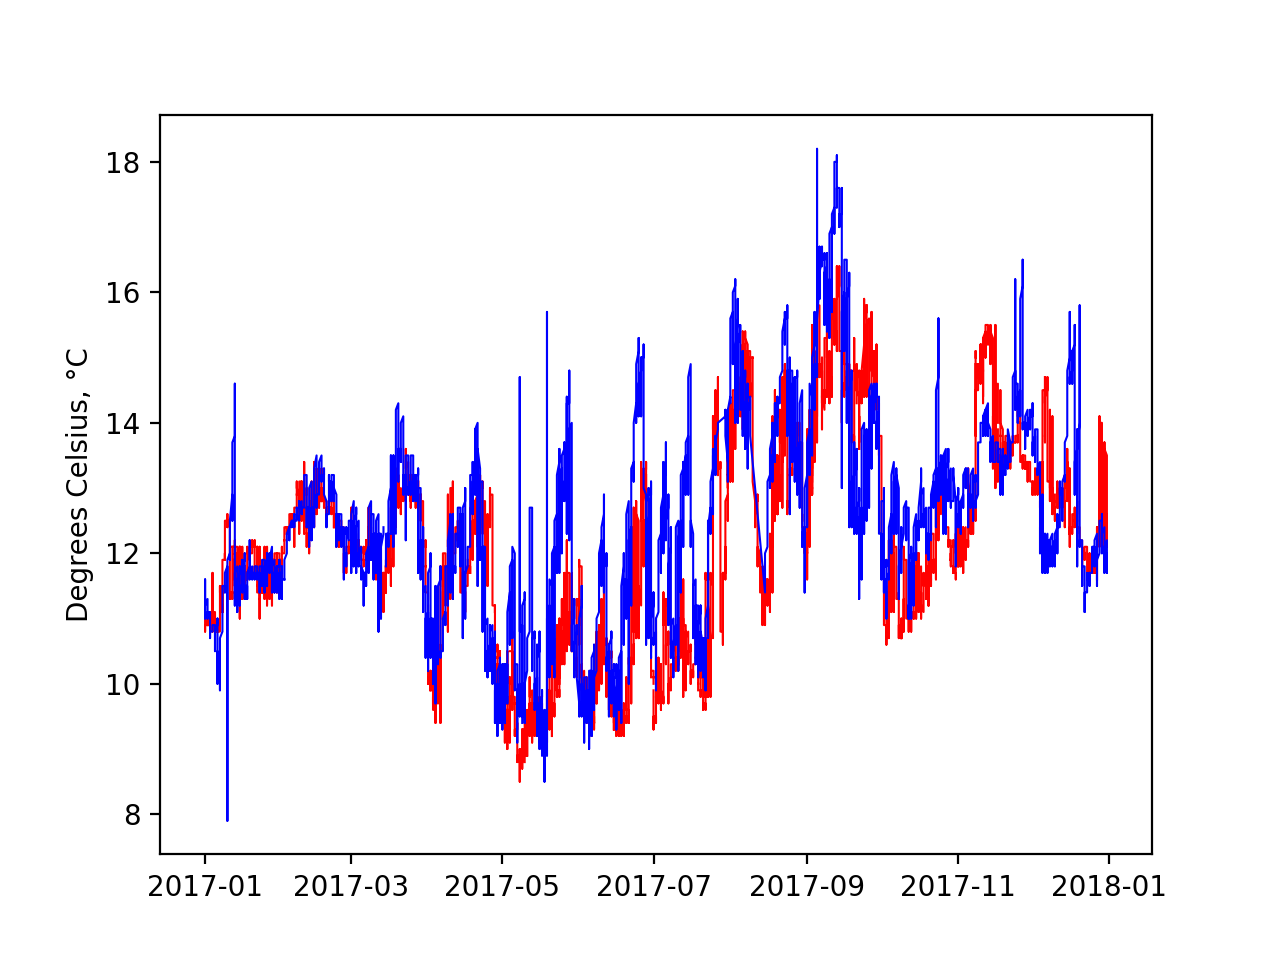

Text(0, 0.5, 'Degrees Celsius, °C')

In [5]:
plt.figure()
plt.plot(time_bbos,temp_bbos,'r',linewidth=0.75)
plt.plot(time_bbns,temp_bbns,'b',linewidth=0.75)
plt.ylabel('Degrees Celsius, °C')


Index(['%yr', 'mo', 'dy', 'hr', 'mn', 'degT', 'm/s', 'm/s.1', 'm', 'sec',
       'sec.1', 'degT.1', 'hPa', 'degC', 'degC.1', 'degC.2', 'mi', 'ft'],
      dtype='object')

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st